Agrupando dados do IntelLab data com **KMeans**, **KNN**, **Hierchical**, **Fuzzy-C-Means** e **DBSCAN**

In [1]:
# Leitura pelo subconjunto discretizado
import pandas as pd
import numpy as np

data = open("data_10h.txt")
lines = data.readlines() # linhas do arquivo
data.close()

# Inicializa as listas para manipulacao
nodeIDs= []
temps = []
humis = []

for l in lines:                 # percorre as linhas do arquivo
    part = l.split()            # separa cada dado por espaco    
    # print(f'{part[0]} | {part[1]} \t| {part[3]} | {part[4]} \t| {part[5]} \t| {part[6]} | {part[7]}')
    if len(part) == 7:          # seleciona apenas dados validos com a divisao correta de 8 valores
        nodeIDs.append(part[4])
        temps.append(part[5])
        humis.append(part[6])

# Transforma a lista de valores de temperaturas e umidades em valores numericos
temps = list(map(float, temps))
humis = list(map(float, humis))
nodeIDs=list(map(int, nodeIDs))

# Cria DataFrame com as linhas do loop com cada coluna importada das listas correspondentes
df_cenario10h = pd.DataFrame({'IDs':nodeIDs,'Temp':temps,'Humid':humis})

print(f'TempMIN = ',df_cenario10h['Temp'].min(), 'TempMAX = ',df_cenario10h['Temp'].max())
print(f'UmidMIN = ',df_cenario10h['Humid'].min(),'UmidMAX = ',df_cenario10h['Humid'].max())

df_cenario10h

TempMIN =  18.8908 TempMAX =  35.9918
UmidMIN =  14.6436 UmidMAX =  34.675


,IDs,Temp,Humid
0,1,25.1040,24.9814
1,1,25.1726,24.9452
2,1,25.2706,24.8000
3,1,25.2020,24.8000
4,1,25.2804,24.8000
...,...,...,...
1868,54,24.4768,26.3197
1869,54,24.4866,26.3197
1870,54,24.5258,26.3197
1871,54,24.5944,26.1754


In [ ]:
# Leitura pelo subconjunto discretizado
import pandas as pd
import numpy as np

data = open("data_16h.txt")
lines = data.readlines() # linhas do arquivo
data.close()

# Inicializa as listas para manipulacao
nodeIDs= []
temps = []
humis = []

for l in lines:                 # percorre as linhas do arquivo
    part = l.split()            # separa cada dado por espaco    
    # print(f'{part[0]} | {part[1]} \t| {part[3]} | {part[4]} \t| {part[5]} \t| {part[6]} | {part[7]}')
    if len(part) == 7:          # seleciona apenas dados validos com a divisao correta de 8 valores
        nodeIDs.append(part[4])
        temps.append(part[5])
        humis.append(part[6])

# Transforma a lista de valores de temperaturas e umidades em valores numericos
temps = list(map(float, temps))
humis = list(map(float, humis))
nodeIDs=list(map(int, nodeIDs))

# Cria DataFrame com as linhas do loop com cada coluna importada das listas correspondentes
df_cenario10h = pd.DataFrame({'IDs':nodeIDs,'Temp':temps,'Humid':humis})

df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.Temp > 36)].index)
df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.Temp < 18)].index)
df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.Humid > 35)].index)
df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.Humid < 14)].index)

print(f'TempMIN = ',df_cenario10h['Temp'].min(), 'TempMAX = ',df_cenario10h['Temp'].max())
print(f'UmidMIN = ',df_cenario10h['Humid'].min(),'UmidMAX = ',df_cenario10h['Humid'].max())

df_cenario10h

Agrupamento usando **KMeans**

In [2]:
from sklearn.cluster import KMeans
# Executa o KMeans para os valores de Temperatura e Umidade (com k=2)
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(df_cenario10h[['Temp','Humid']])
# kmeans = kmeans.fit(df_cenario10h[['Temp']])
# kmeans.cluster_centers_ = np.array([[30.33388,19.581979],[23.643087,27.957787]])
# kmeans.cluster_centers_ = np.array([[30.3,19.5],[23.6,27.9]])
# kmeans.cluster_centers_ = np.array([23,29])
centroides = kmeans.cluster_centers_
# print(centroides)
# print(type(centroides))
centroides = pd.DataFrame(centroides,columns=['CenterTEMP','CenterHUMID'])
# centroides = pd.DataFrame(centroides,columns=['CenterTEMP'])
print(f'Centroides = \n{centroides} \n')
# print(f'com tipo {type(centroides)}') # Mostra os centroides identificados

Centroides = 
   CenterTEMP  CenterHUMID
0   31.575932    18.421207
1   23.866621    27.642086 



In [3]:
kmeans = kmeans.fit(df_cenario10h[['Temp','Humid']])

print(f'Centroides =\n{kmeans.cluster_centers_}') # Mostra os centroides identificados

# Cria uma coluna com a classificacao resultante do KMeanss
df_cenario10h['KMEANS'] = kmeans.labels_

df_cenario10h

Centroides =
[[31.57593248 18.42120679]
 [23.86662068 27.64208581]]


,IDs,Temp,Humid,KMEANS
0,1,25.1040,24.9814,1
1,1,25.1726,24.9452,1
2,1,25.2706,24.8000,1
3,1,25.2020,24.8000,1
4,1,25.2804,24.8000,1
...,...,...,...,...
1868,54,24.4768,26.3197,1
1869,54,24.4866,26.3197,1
1870,54,24.5258,26.3197,1
1871,54,24.5944,26.1754,1


In [4]:
# Discretizando o DataFrame com a media das leituras
df_cenario10h = df_cenario10h.groupby('IDs').mean().reset_index()

# df_cenario10h = df_cenario10h.drop_duplicates(subset=['IDs','KMEANS'],keep='first')
df_kmeans = df_cenario10h
df_cenario10h

,IDs,Temp,Humid,KMEANS
0,1,25.283383,24.923828,1.000000
1,2,23.900840,28.306834,1.000000
2,3,24.100565,26.723589,1.000000
3,4,23.429214,28.286386,1.000000
4,6,23.969462,26.707335,1.000000
5,7,23.611477,26.867381,1.000000
6,8,25.669359,24.166876,1.000000
7,9,26.476980,24.040020,1.000000
8,10,25.284108,26.030895,1.000000
9,11,25.982541,25.317576,1.000000


In [5]:
kmeans = kmeans.fit(df_cenario10h[['Temp','Humid']])

print(f'Centroides =\n{kmeans.cluster_centers_}') # Mostra os centroides identificados

# Cria uma coluna com a classificacao resultante do KMeanss
df_cenario10h['KMEANS'] = kmeans.labels_

df_cenario10h

Centroides =
[[23.64308783 27.95778764]
 [30.333888   19.58197966]]


,IDs,Temp,Humid,KMEANS
0,1,25.283383,24.923828,0
1,2,23.900840,28.306834,0
2,3,24.100565,26.723589,0
3,4,23.429214,28.286386,0
4,6,23.969462,26.707335,0
5,7,23.611477,26.867381,0
6,8,25.669359,24.166876,0
7,9,26.476980,24.040020,0
8,10,25.284108,26.030895,0
9,11,25.982541,25.317576,0


In [6]:
# Executar somente em caso de coluna KMEANS como float

# df_cenario10h = pd.to_numeric(df_cenario10h['KMEANS'])
df_cenario10h.KMEANS = df_cenario10h.KMEANS.apply(np.ceil)
df_cenario10h.KMEANS = df_cenario10h.KMEANS.astype(int)
# df_cenario10h.to_numeric(df_cenario10h)
df_cenario10h

,IDs,Temp,Humid,KMEANS
0,1,25.283383,24.923828,0
1,2,23.900840,28.306834,0
2,3,24.100565,26.723589,0
3,4,23.429214,28.286386,0
4,6,23.969462,26.707335,0
5,7,23.611477,26.867381,0
6,8,25.669359,24.166876,0
7,9,26.476980,24.040020,0
8,10,25.284108,26.030895,0
9,11,25.982541,25.317576,0


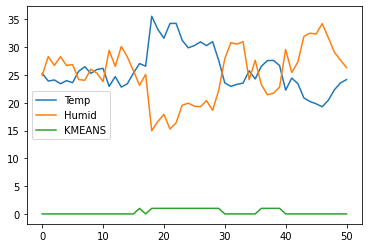

In [ ]:
import seaborn as sb
# Exibe valores de temperatura e umidade
# sb.pairplot(df_cenario10h,hue=['temp','humid'])
df_cenario10h[['Temp','Humid','KMEANS']].plot();

In [ ]:
df_blue = df_cenario10h[df_cenario10h['KMEANS'] == 0]
df_red  = df_cenario10h[df_cenario10h['KMEANS'] == 1]

print(f'Blue = {len(df_blue)}\t Red = {len(df_red)}')

IDs_blue = df_blue['IDs'].to_list() # transforma a coluna do DataFrame em lista
IDs_red  = df_red ['IDs'].to_list()  # transforma a coluna do DataFrame em lista

IDs_blue = list(dict.fromkeys(IDs_blue))       # remove os valores duplicados
IDs_red  = list(dict.fromkeys(IDs_red ))       # remove os valores duplicados

print(f'lista com {len(IDs_blue)} nodos azuis:\n {IDs_blue}')
print(f'lista com {len(IDs_red)} nodos vermelhos:\n {IDs_red}')

Blue = 34	 Red = 17
lista com 34 nodos azuis:
 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 34, 35, 36, 37, 38, 39, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
lista com 17 nodos vermelhos:
 [19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 40, 41, 42, 43]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



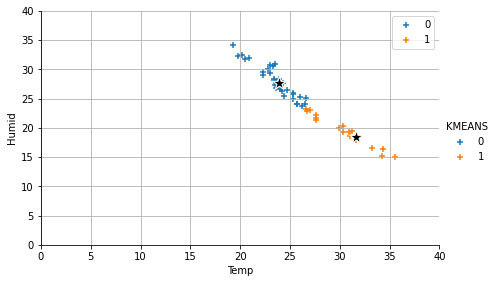

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

# centroides = pd.DataFrame(centroides)

fg = sb.FacetGrid(data=df_cenario10h, hue='KMEANS', aspect=1.61,height=4);
fg.map(plt.scatter, 'Temp', 'Humid', marker='+',s=30).add_legend()
sb.scatterplot(centroides['CenterTEMP'],centroides['CenterHUMID'], marker='*',color='k',s=200)
# sb.scatterplot(centroides['CenterTEMP'], marker='*',color='k',s=200).legend()
plt.grid()
fg.set(xlim=(0,40))
fg.set(ylim=(0,40))

In [ ]:
fig = px.scatter(df_cenario10h, x="Temp", y="Humid",text="IDs",color='KMEANS',symbol='KMEANS',color_continuous_scale='Rainbow',hover_data=['IDs'])
fig.update_traces(textposition='top center', textfont_size=9)
# fig.update_layout(uniformtext_minsize=2, uniformtext_mode='hide')
fig.show()

Agrupamento com **DBSCAN**

In [ ]:
# Remover coluna KMEANS
df_cenario10h = df_cenario10h.drop('KMEANS',axis=1)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5,min_samples=2)
dbscan.fit(df_cenario10h[['Temp','Humid']])
print(dbscan.labels_)
df_cenario10h['DBSCAN'] = dbscan.labels_
df_cenario10h

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,IDs,Temp,Humid,DBSCAN
0,1,25.283383,24.923828,0
1,2,23.900840,28.306834,0
2,3,24.100565,26.723589,0
3,4,23.429214,28.286386,0
4,6,23.969462,26.707335,0
5,7,23.611477,26.867381,0
6,8,25.669359,24.166876,0
7,9,26.476980,24.040020,0
8,10,25.284108,26.030895,0
9,11,25.982541,25.317576,0


In [ ]:
IDs_blue_db = df_cenario10h[df_cenario10h['DBSCAN'] == 0]
IDs_red_db  = df_cenario10h[df_cenario10h['DBSCAN'].isin([1,-1])]

IDs_blue_db = IDs_blue_db['IDs'].to_list() # transforma a coluna do DataFrame em lista
IDs_red_db  = IDs_red_db['IDs'].to_list()  # transforma a coluna do DataFrame em lista

IDs_blue_db = list(dict.fromkeys(IDs_blue_db))       # remove os valores duplicados
IDs_red_db  = list(dict.fromkeys(IDs_red_db))       # remove os valores duplicados

print(f'lista com {len(IDs_blue_db)} nodos azuis:\n {IDs_blue_db}')
print(f'lista com {len(IDs_red_db)} nodos vermelhos:\n {IDs_red_db}')

lista com 40 nodos azuis:
 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
lista com 11 nodos vermelhos:
 [21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32]


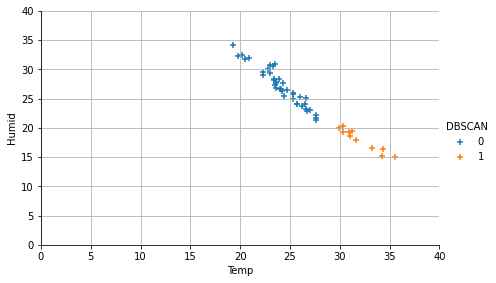

In [ ]:
fg = sb.FacetGrid(data=df_cenario10h, hue='DBSCAN', aspect=1.61,height=4);
fg.map(plt.scatter, 'Temp', 'Humid', marker='+',s=30).add_legend()
plt.grid()
fg.set(xlim=(0,40))
fg.set(ylim=(0,40))


In [ ]:
fig = px.scatter(df_cenario10h, x="Temp", y="Humid",text="IDs",color='DBSCAN',symbol='DBSCAN',color_continuous_scale='Rainbow',hover_data=['IDs'])
fig.update_traces(textposition='top center', textfont_size=9)
fig.show()

Agrupamento usando **Clusterização Hierárquica**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

df_cenario10h = df_cenario10h.drop('DBSCAN',axis=1)
# df_cenario10h = df_cenario10h.drop('HIERARC',axis=1)

# o criterio linkage determina a métrica usada para a estratégia de mesclagem
hierarc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# resultado igual para todas os parametros de affinity e linkage
hierarc.fit_predict(df_cenario10h[['Temp','Humid']])

df_cenario10h['HIERARC'] = hierarc.labels_
df_cenario10h

,IDs,Temp,Humid,HIERARC
0,1,25.283383,24.923828,0
1,2,23.900840,28.306834,0
2,3,24.100565,26.723589,0
3,4,23.429214,28.286386,0
4,6,23.969462,26.707335,0
5,7,23.611477,26.867381,0
6,8,25.669359,24.166876,0
7,9,26.476980,24.040020,0
8,10,25.284108,26.030895,0
9,11,25.982541,25.317576,0


In [ ]:
IDs_blue_h = df_cenario10h[df_cenario10h['HIERARC'] == 0]
IDs_red_h = df_cenario10h[df_cenario10h['HIERARC'].isin([1,-1])]

IDs_blue_h = IDs_blue_h['IDs'].to_list() # transforma a coluna do DataFrame em lista
IDs_red_h  = IDs_red_h['IDs'].to_list()  # transforma a coluna do DataFrame em lista

IDs_blue_h = list(dict.fromkeys(IDs_blue_db))       # remove os valores duplicados
IDs_red_h  = list(dict.fromkeys(IDs_red_db))       # remove os valores duplicados

print(f'lista com {len(IDs_blue_h)} nodos azuis:\n {IDs_blue_h}')
print(f'lista com {len(IDs_red_h)} nodos vermelhos:\n {IDs_red_h}')

lista com 40 nodos azuis:
 [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
lista com 11 nodos vermelhos:
 [21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32]


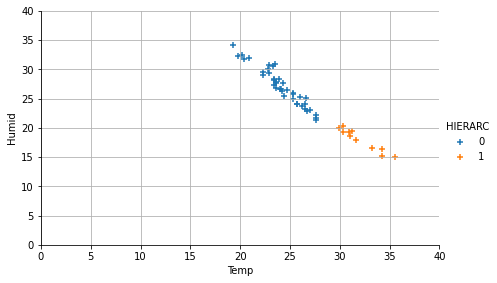

In [ ]:
fg = sb.FacetGrid(data=df_cenario10h, hue='HIERARC', aspect=1.61,height=4);
fg.map(plt.scatter, 'Temp', 'Humid', marker='+',s=30).add_legend()
plt.grid()
fg.set(xlim=(0,40))
fg.set(ylim=(0,40))

Agrupamento usando **Fuzzy-C-Means**

In [ ]:
# import skfuzzy as fuzz
!pip install fuzzy-c-means

In [ ]:
from fcmeans import FCM

In [ ]:
# df_cenario10h = df_cenario10h.drop('HIERARC',axis=1)
df_cenario10h

,IDs,Temp,Humid,HIERARC
0,1,25.283383,24.923828,0
1,2,23.900840,28.306834,0
2,3,24.100565,26.723589,0
3,4,23.429214,28.286386,0
4,6,23.969462,26.707335,0
5,7,23.611477,26.867381,0
6,8,25.669359,24.166876,0
7,9,26.476980,24.040020,0
8,10,25.284108,26.030895,0
9,11,25.982541,25.317576,0


In [ ]:
fcm = FCM(n_clusters=2)
# df_fcm = df_cenario10h.drop('IDs',axis=1)
# df_cenario10h
df_fcm = df_cenario10h[['Temp','Humid']]
df_fcm
df_array = df_fcm.to_numpy() # transforma os valores em array
df_array
fcm.fit(df_array)

In [ ]:
df_cenario10h = df_cenario10h.drop(['Temp','Humid','HIERARC'],axis=1)
df_cenario10h

In [ ]:
df_fcm = pd.DataFrame(df_array, columns = ['Temp','Humid'])
df_fcm['FUZZYCM'] = fcm.predict(df_array) # o labels_ do fcm eh o resultado de fcm.predict(np.array)
df_fcm

In [ ]:
df_cenario10h['Temp'] = df_fcm['Temp']
df_cenario10h['Humid'] = df_fcm['Humid']
df_cenario10h['FUZZYCM'] = df_fcm['FUZZYCM']
df_cenario10h

,IDs,Temp,Humid,FUZZYCM
0,1,25.283383,24.923828,1
1,2,23.900840,28.306834,1
2,3,24.100565,26.723589,1
3,4,23.429214,28.286386,1
4,6,23.969462,26.707335,1
5,7,23.611477,26.867381,1
6,8,25.669359,24.166876,1
7,9,26.476980,24.040020,1
8,10,25.284108,26.030895,1
9,11,25.982541,25.317576,1


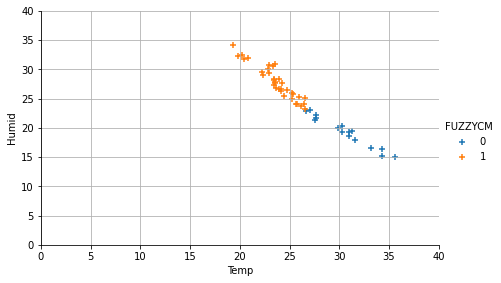

In [ ]:
fg = sb.FacetGrid(data=df_cenario10h, hue='FUZZYCM', aspect=1.61,height=4);
fg.map(plt.scatter, 'Temp', 'Humid', marker='+',s=30).add_legend()
plt.grid()
fg.set(xlim=(0,40))
fg.set(ylim=(0,40))

In [ ]:
fig = px.scatter(df_cenario10h, x="Temp", y="Humid",text="IDs",color='FUZZYCM',symbol='FUZZYCM',color_continuous_scale='Rainbow',hover_data=['IDs'])
fig.update_traces(textposition='top center', textfont_size=9)
fig.show()

Agrupamento usando **KNN**

In [ ]:
# Visualiza o formato do dataframe que sera usado para treinamento
df_kmeans.head()

,IDs,Temp,Humid,KMEANS
0,1,25.283383,24.923828,0
1,2,23.900840,28.306834,0
2,3,24.100565,26.723589,0
3,4,23.429214,28.286386,0
4,6,23.969462,26.707335,0


In [ ]:
# Separa uma parte do dataframe para treinamento
df_knn = df_kmeans[11:26]

# Executa o KNN para classificar os nodos que serao usados para clusterizacao
from sklearn.neighbors import KNeighborsClassifier

# treinamento dos dados considerando o numero de vizinhos, a metrica de distancia para construir grupos e o calculo da distancia entre os pontos
# interessante usar numero de vizinhos impar para nao ter empate, parametro p=2 define que a distancia Euclidiana usada para pontos
knn_treina = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn_treina.fit(df_knn[['Temp','Humid']],df_knn['KMEANS'])

KNeighborsClassifier()

In [ ]:
knn_previsoes = knn_treina.predict(df_kmeans[['Temp','Humid']])
knn_previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
print(f'df_knn = {len(df_knn)} e previsoes = {len(knn_previsoes)}') 
df_knn_novo = df_kmeans
df_knn_novo['KNN'] = knn_previsoes

df_knn = 15 e previsoes = 51


In [ ]:
df_knn_novo

,IDs,Temp,Humid,KMEANS,KNN
0,1,25.283383,24.923828,0,0
1,2,23.900840,28.306834,0,0
2,3,24.100565,26.723589,0,0
3,4,23.429214,28.286386,0,0
4,6,23.969462,26.707335,0,0
5,7,23.611477,26.867381,0,0
6,8,25.669359,24.166876,0,0
7,9,26.476980,24.040020,0,0
8,10,25.284108,26.030895,0,0
9,11,25.982541,25.317576,0,0


In [ ]:
df_cenario10h = df_knn_novo.drop('KMEANS',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



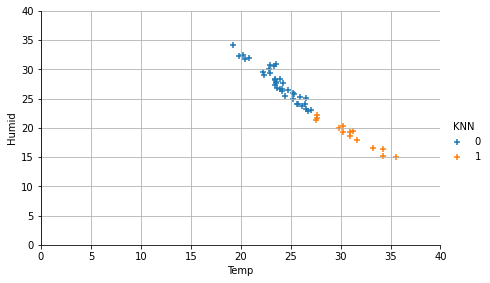

In [ ]:
fg = sb.FacetGrid(data=df_cenario10h, hue='KNN', aspect=1.61,size=4)
fg.map(plt.scatter, 'Temp', 'Humid', marker='+',s=30).add_legend()
plt.grid()
fg.set(xlim=(0,40))
fg.set(ylim=(0,40))

In [ ]:
fig = px.scatter(df_cenario10h, x="Temp", y="Humid",text="IDs",color='KNN',symbol='KNN',color_continuous_scale='Rainbow',hover_data=['IDs'])
fig.update_traces(textposition='top center', textfont_size=9)
fig.show()

- - - - - - - - - - - - - - - - - -
Desconsiderar codigo a partir daqui
- - - - - - - - - - - - - - - - - -

In [ ]:
# Somente se precisar forcar os valores do Tadeu
df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.Temp > 35)].index)
df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.Temp < 18)].index)

df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.Humid > 35)].index)
df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.Humid < 14)].index)

df_cenario10h = df_cenario10h.drop(df_cenario10h[(df_cenario10h.IDs > 54)].index)
# df_cenario10h

In [ ]:
# df_cenario10h = df_cenario10h.drop_duplicates(subset=['IDs'],keep='last')
# df_cenario10h = df_cenario10h.groupby('IDs').mean().reset_index()

print('TempMIN = ',df_cenario10h['Temp'].min(), 'TempMAX = ',df_cenario10h['Temp'].max())
print(f'UmidMIN = ',df_cenario10h['Humid'].min(),'UmidMAX = ',df_cenario10h['Humid'].max())

TempMIN =  18.8908 TempMAX =  35.9918
UmidMIN =  14.6436 UmidMAX =  34.675
